<h1>Modelado de los datos</h1>

<h2>Importar modulos</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h2>Cargar el dataset</h2>

In [3]:
from inf_bancaria.config import clean_data_path

In [4]:
df = pd.read_csv(clean_data_path)

<h2>Convertir variables cardinales a ordinales</h2>

In [5]:
from inf_bancaria.modeling import encode_categorical_vars

In [6]:
df_clean = encode_categorical_vars(df, ['TIPO_CTE','NIVEL_RIESGO', 'TIPO_VIVIENDA','ESCOLARIDAD'])

<h2>Definir Features y Target</h2>


In [18]:
x = df[['EDAD']]
y = df[['INGRESO_INFERIDO']]

In [ ]:
z = df[['SCORE_COMPORTAMIENTO', 'SCORE_CLIENTE', 'EDAD', 'INGRESO_INFERIDO']]

<h2>1. Regresion lineal</h2>

In [19]:
lm = LinearRegression()
lm.fit(x,y)
yhat = lm.predict(x)
print(lm.intercept_, lm.coef_)

[-53737.91427339] [[2264.26340567]]


In [20]:
yhat = -53737.91427339 + 2264.26340567*df['EDAD']
yhat

0        2868.670868
1        2868.670868
2        2868.670868
3        2868.670868
4        2868.670868
            ...     
4111    82117.890067
4112    82117.890067
4113    82117.890067
4114    82117.890067
4115    82117.890067
Name: EDAD, Length: 4116, dtype: float64

(0.0, 113691.31236126005)

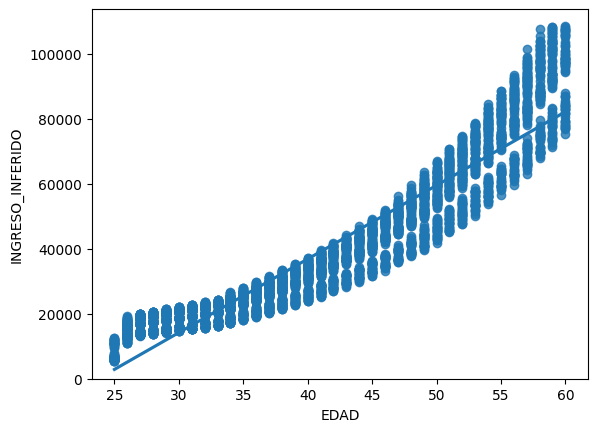

In [22]:
plt.figure()
sns.regplot(x='EDAD', y='INGRESO_INFERIDO', data=df)
plt.ylim(0,)

<h2>Pipeline</h2>